In [1]:
import sys,argparse,os,pandas,numpy,copy
sys.path.append('/home/heyangle/Desktop/ScanCraft/ScanCraft')
from command.file_operations.GetDirectories import GetDirectories
from command.file_operations.GetSamples import GetSamples

In [2]:
folders=GetDirectories(path='./Pylon',keyword='record',numbered=False)

In [3]:
folders

['/home/heyangle/Desktop/ScanCraft/ScanCraft/laboratory/Pylon/record']

In [4]:
sample_collect=[
    GetSamples( path=os.path.join( folder,'' ), patterns=['inp','spectr','omega'] )
    for folder in folders
]

In [5]:
samples=sum(sample_collect,[])

In [6]:
samples[0].__dict__

{'documents': {'inp': '/home/heyangle/Desktop/ScanCraft/ScanCraft/laboratory/Pylon/record/inp.dat.0',
  'omega': '/home/heyangle/Desktop/ScanCraft/ScanCraft/laboratory/Pylon/record/omega.dat.0',
  'spectr': '/home/heyangle/Desktop/ScanCraft/ScanCraft/laboratory/Pylon/record/spectr.dat.0'}}

In [7]:
# os.mkdir('random_samples')
# os.mkdir('random_samples/record_1')
# os.mkdir('random_samples/record_2')
# os.mkdir('random_samples/record_3')

In [8]:
# for i, s in enumerate(samples[30000:]):
#     new_documents={}
#     new_documents['inp']=os.path.join('./random_samples/record_4/','inp.dat.'+str(i))
#     new_documents['spectr']=new_documents['inp'].replace('inp','spectr')
#     new_documents['omega']=new_documents['inp'].replace('inp','omega')
#     s.MoveTo(new_documents)

In [9]:
from command.scan.scan import scan
from command.NMSSMTools import NMSSMTools
from command.data_transformer.InputListToPandas import InputListToPandas as I2P
mold=scan(method='random')
mold.AddScalar('tanB','MINPAR',3,1.,60.)
mold.AddScalar('M1','EXTPAR',1  ,20.    ,1000.)
mold.AddScalar('M2','EXTPAR'   ,2  ,100.    ,2000.)
mold.AddScalar('Atop','EXTPAR'   ,11  ,  -6e3    ,6e3)
mold.AddFollower('Abottom','EXTPAR'   ,12,'Atop')
mold.AddScalar('Atau','EXTPAR'   ,13  ,  100.      ,2000.)
mold.AddFollower('MtauL','EXTPAR'   ,33,'Atau')
mold.AddFollower('MtauR','EXTPAR'   ,36,'Atau')
mold.AddScalar('MQ3L','EXTPAR'   ,43,	100.,	2.e3)
mold.AddScalar('MtopR'	,'EXTPAR'   ,46,	100.,	2.e3)
mold.AddFollower('MbottomR','EXTPAR'  ,49,'MtopR')
mold.AddScalar('Lambda','EXTPAR'  ,61  ,1e-3    ,1. ,prior_distribution='exponential')
mold.AddScalar('Kappa','EXTPAR'   ,62 ,1.e-3    ,1. ,prior_distribution='exponential')
mold.AddScalar('A_Lambda','EXTPAR' ,63,-3.e3,3.e3)
mold.AddScalar('A_kappa','EXTPAR' ,64,-3.e3,3.e3)
mold.AddScalar('mu_eff','EXTPAR'  ,65,100.,1500.)

In [10]:
mold.variable_list.keys()

dict_keys(['tanB', 'M1', 'M2', 'Atop', 'Abottom', 'Atau', 'MtauL', 'MtauR', 'MQ3L', 'MtopR', 'MbottomR', 'Lambda', 'Kappa', 'A_Lambda', 'A_kappa', 'mu_eff'])

In [11]:
for sample in samples:
    sample.input=copy.deepcopy(mold)
    in_file=sample.documents['inp']
    sample.input.GetValue(in_file)

In [12]:
input_list=[point.input for point in samples]
input_table=I2P(input_list,title='accepted')
input_table[('flags','binary','1/0_is/not','calculable')]=1

In [13]:
from command.pytorch.normalize import NormalizePointList as NormP
from command.pytorch.normalize import GetRanges

In [14]:
NormP(input_list)

title normalized                                                              \
block     MINPAR    EXTPAR                                                     
code          3         1         2         11        13        43        46   
name        tanB        M1        M2      Atop      Atau      MQ3L     MtopR   
0       0.246445  0.226739  0.333239  0.698879  0.966224  0.656775  0.326197   
1       0.857030  0.021667  0.706515  0.995912  0.602455  0.961800  0.541757   
2       0.742109  0.241891  0.870374  0.980301  0.234042  0.659121  0.768167   
3       0.564648  0.293834  0.296070  0.288665  0.733315  0.826901  0.769737   
4       0.411364  0.618185  0.872031  0.679980  0.304027  0.789496  0.609217   
5       0.282432  0.141222  0.885008  0.696730  0.180658  0.791560  0.083616   
6       0.459969  0.873241  0.817384  0.395717  0.313720  0.638572  0.169280   
7       0.449908  0.311877  0.577837  0.872068  0.140792  0.994717  0.830031   
8       0.885135  0.809379  0.374808  0.262421  0.980488  0.300496  0.635616   
9       0.549092  0.717106  0.753213  0.733313  0.625194  0.839331  0.228418   
10      0.343793  0.638110  0.619419  0.794918  0.839879  0.463107  0.783531   
11      0.323489  0.810479  0.947807  0.050041  0.667817  0.720610  0.674906   
12      0.876468  0.820461  0.317078  0.432904  0.592656  0.670487  0.200127   
13      0.559237  0.477622  0.226364  0.297460  0.823213  0.225994  0.565485   
14      0.105245  0.392888  0.734349  0.261493  0.847417  0.963049  0.817326   
15      0.508854  0.854905  0.535234  0.367048  0.432664  0.982492  0.601169   
16      0.151684  0.422332  0.440589  0.679124  0.293686  0.930258  0.986939   
17      0.887861  0.245075  0.664874  0.221503  0.413329  0.297657  0.798585   
18      0.354164  0.427476  0.927273  0.589952  0.937040  0.364705  0.221316   
19      0.254836  0.776979  0.101273  0.701926  0.575447  0.348544  0.378094   
20      0.481001  0.410568  0.751287  0.696290  0.714170  0.426582  0.188017   
21      0.787658  0.217481  0.612538  0.223859  0.399035  0.784080  0.707619   
22      0.959847  0.164018  0.148139  0.577906  0.474156  0.883461  0.072329   
23      0.006986  0.031031  0.291159  0.973528  0.120420  0.665269  0.333121   
24      0.897098  0.638983  0.743780  0.160855  0.235526  0.731081  0.972247   
25      0.618569  0.491107  0.418508  0.132250  0.492897  0.258999  0.566732   
26      0.783973  0.566704  0.492419  0.672422  0.907427  0.929705  0.760956   
27      0.529019  0.406360  0.470895  0.778657  0.755095  0.496646  0.592590   
28      0.475820  0.769752  0.716384  0.532772  0.813892  0.868005  0.331873   
29      0.356283  0.126739  0.948930  0.485076  0.795950  0.528425  0.617709   
30      0.505561  0.266252  0.055611  0.673425  0.848546  0.947556  0.454437   
31      0.417520  0.358028  0.219269  0.735529  0.805355  0.785314  0.613303   
32      0.490795  0.805222  0.309373  0.538499  0.488907  0.440568  0.662369   
33      0.623398  0.386187  0.196791  0.355899  0.244590  0.253135  0.274397   
34      0.215409  0.407201  0.611195  0.543772  0.613647  0.701843  0.514054   
35      0.278944  0.830480  0.339374  0.428999  0.605504  0.426761  0.647628   
36      0.578302  0.314613  0.598788  0.646303  0.975637  0.135876  0.260380   
37      0.570257  0.338228  0.422008  0.779752  0.404889  0.263277  0.750931   
38      0.580911  0.741224  0.586398  0.349690  0.095002  0.865421  0.186376   
39      0.192226  0.540469  0.170076  0.922395  0.996000  0.915127  0.530855   
40      0.983075  0.350599  0.539735  0.495367  0.146439  0.315198  0.574112   
41      0.560081  0.962137  0.165750  0.240862  0.534383  0.433178  0.816789   
42      0.179998  0.483731  0.799998  0.634325  0.674306  0.399839  0.509623   

title                                                    
block                                                    
code         61        62        63        64        65  
name     Lambda     Kappa  A_Lambda   A_kappa    mu_eff  
0      

In [15]:
GetRanges(mold.free_parameter_list)

array([[  1.00000000e+00,   2.00000000e+01,   1.00000000e+02,
         -6.00000000e+03,   1.00000000e+02,   1.00000000e+02,
          1.00000000e+02,   1.00000000e-03,   1.00000000e-03,
         -3.00000000e+03,  -3.00000000e+03,   1.00000000e+02],
       [  6.00000000e+01,   1.00000000e+03,   2.00000000e+03,
          6.00000000e+03,   2.00000000e+03,   2.00000000e+03,
          2.00000000e+03,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+03,   3.00000000e+03,   1.50000000e+03]])

In [16]:
from command.pytorch.normalize import DenormalizeUniform

In [17]:
DenormalizeUniform(_14,mold)

title normalized                                                     \
block     MINPAR      EXTPAR                                          
code          3           1            2            11           13   
name        tanB          M1           M2         Atop         Atau   
0      15.540246  242.204585   733.153709  2386.549011  1935.825719   
1      51.564786   41.233225  1442.378719  5950.939045  1244.663805   
2      44.784402  257.052823  1753.709714  5763.616799   544.680319   
3      34.314233  307.957203   662.532729 -2536.020815  1493.299065   
4      25.270467  625.821071  1756.859465  2159.759331   677.650503   
5      17.663468  158.398012  1781.515859  2360.754804   443.250765   
6      28.138152  875.776438  1653.028913 -1251.400160   696.068287   
7      27.544550  325.639222  1197.890883  4464.813407   367.505471   
8      53.222961  813.191030   812.135765 -2850.952239  1962.927597   
9      33.396413  722.763409  1531.105107  2799.751261  1287.868756   
10     21.283767  645.347377  1276.897035  3539.021331  1695.769271   
11     20.085880  814.269498  1900.833226 -5399.508980  1368.853000   
12     52.711586  824.051955   702.447391  -805.154153  1226.046779   
13     33.994992  488.069846   530.091549 -2430.478283  1664.105540   
14      7.209439  405.030017  1495.262665 -2862.079985  1710.091500   
15     31.022394  857.807294  1116.944201 -1595.422789   922.062528   
16      9.949362  433.885610   937.118264  2149.483925   658.003896   
17     53.383804  260.173540  1363.260314 -3341.967492   885.325269   
18     21.895684  438.926809  1861.818096  1079.423344  1880.375734   
19     16.035314  781.439478   292.417836  2423.115108  1193.350150   
20     29.379042  422.356500  1527.445922  2355.485198  1456.923431   
21     47.471819  233.131595  1263.822891 -3313.693093   858.166953   
22     57.630986  180.737782   381.464660   934.870196  1000.895694   
23      1.412198   50.410184   653.202478  5682.338926   328.798264   
24     53.928787  646.203175  1513.182304 -4069.745361   547.498775   
25     37.495577  501.285267   895.165605 -4413.002755  1036.503858   
26     47.254407  575.369929  1035.596004  2069.066052  1824.110927   
27     32.212136  418.232713   994.701081  3343.888941  1534.681310   
28     29.073376  774.356978  1461.130235   393.268244  1646.395525   
29     22.020720  144.204578  1902.966503  -179.087363  1612.304604   
30     30.828095  280.927326   205.660905  2081.101708  1712.237456   
31     25.633660  370.867168   516.611805  2826.351059  1630.175375   
32     29.956929  809.117915   687.809429   461.983735  1028.923099   
33     37.780509  398.463324   473.903360 -1729.216670   564.721786   
34     13.709114  419.056793  1261.270963   525.266308  1265.928679   
35     17.457699  833.870297   744.811433  -852.013619  1250.456794   
36     35.119842  328.320952  1237.697631  1755.635172  1953.710662   
37     34.645189  351.463222   901.815864  3357.027091   869.290010   
38     35.273752  746.399746  1214.156353 -1803.718302   280.503274   
39     12.341327  549.659391   423.143657  5068.735555  1992.399121   
40     59.001420  363.587163  1125.495989   -55.592345   378.233538   
41     34.044800  962.894533   414.924980 -3109.660182  1115.327999   
42     11.619867  494.056833  1619.997135  1611.902473  1381.180537   

title                                                                          \
block                                                                           
code            43           46        61        62           63           64   
name          MQ3L        MtopR    Lambda     Kappa     A_Lambda      A_kappa   
0      1347.872517   719.773791  0.001518  0.074667   101.203506 -1237.858977   
1      1927.420625  1129.337920  0.199234  0.524885   337.445532 -1405.385128   
2      1352.330850  1559.517349  0.026026  0.082996  1569.248560 -2385.310971   
3      1671.112089  1562.500084  0.096860  0.537903  2966.611411  -662.632796   
4      1600.04

In [24]:
input_table.values[:,0]-_17.values[:,0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [12]:
input_table.to_csv(os.path.join('accepted.csv'))

In [26]:
type(input_table)

pandas.core.frame.DataFrame

In [13]:
import pandas
exc1=pandas.read_csv('all_1229/excluded_2.csv',header=[0,1,2,3],index_col=0)

In [15]:
exc2=pandas.read_csv('alll_1228/excluded_1.csv',header=[0,1,2,3],index_col=0)
exc3=pandas.read_csv('all_rand_spec_171211/excluded.csv',header=[0,1,2,3],index_col=0)

In [18]:
exc=exc1.append([exc2,exc3],ignore_index=True)

In [19]:
exc

title    excluded                                                     \
block      MINPAR      EXTPAR                                          
code            3           1            2           11           13   
name         tanB          M1           M2         Atop         Atau   
0       14.911349  455.564058  1784.015639   585.921959  1832.367388   
1       55.882964  489.434953  1155.730929 -4247.684334   751.913958   
2       18.005837  432.394626  1934.322302 -4299.661550   904.644962   
3       49.957601  646.455886  1112.333128   843.144768   262.125492   
4       46.325778  139.125751   863.646178 -3044.652783   466.743322   
5        8.633026  619.110622  1786.674351 -2188.342820   604.725038   
6       48.226035  599.787424   830.981685 -1522.220132   726.092946   
7       30.045965  361.556339  1008.128135  5619.392972  1653.000191   
8       39.573347  897.537591   387.780003 -3065.479725  1632.637831   
9       44.369269  330.908315   795.482153  -199.407469  1874.771109   
10      46.952121  279.590629   446.653891 -4302.011628  1090.564118   
11      10.532749  785.869159   252.036304  4861.615886  1647.143814   
12      15.721119  131.945725   732.241408   851.861179  1579.013316   
13      21.556520  303.551821   164.373563 -4168.845633  1487.155085   
14      57.402519  177.931543   638.175335  3325.386187   721.485955   
15      12.082747  349.402087   728.695753 -2622.181814   283.191222   
16      39.875271  273.604315   191.716873 -1797.182023  1537.989679   
17      36.354284  260.748385  1694.012062 -4757.780463  1469.446895   
18      44.846136  880.174334  1711.294420 -5000.269568  1578.313834   
19      25.175636  945.411824  1169.235990 -3102.442832  1591.180770   
20      48.969482  424.016195  1246.277699 -4591.878728  1463.550501   
21      53.449971  818.274538   537.090828 -3310.985670   783.237185   
22      10.022120  616.207668   317.451133  -629.200989   606.287793   
23      34.827406   23.290134   896.918604  1397.856218   562.046044   
24       4.618191  577.607401  1084.194473  4812.252123  1665.979697   
25      22.209003  997.519799  1009.304664  1435.561105   561.035650   
26      55.439903  261.080409  1152.455875 -2384.855739  1304.274108   
27      19.397473  893.065996  1545.346553  2120.149984  1166.031004   
28      24.039378  302.958193  1109.852034  5250.905782   605.231372   
29      53.913164  101.975010  1410.661294  3347.349326  1205.000928   
...           ...         ...          ...          ...          ...   
103532   5.781248  330.071526  1664.227390 -5029.531369   125.072968   
103533  14.635712  137.313818   237.850337  3786.800037   352.329194   
103534  27.545751  458.870222   512.439945  2763.310664  1228.994539   
103535  31.972496  935.681176  1769.466090  3108.858408   492.495207   
103536  28.389805  218.910941  1444.250688  5139.455815   239.118226   
103537  33.312739  241.513388   790.840177 -2645.736335   775.043506   
103538  36.073060  510.235324   532.146964   664.574545   616.909478   
103539  45.016620  127.758132  1288.842520  4330.314576  1933.917113   
103540  50.362776  767.605133  1468.894691 -1838.122852   676.495065   
103541  41.197831  111.997600  1623.868206 -4663.504573  1788.940681   
103542  25.494282  614.180767   955.035401  4230.446984   354.889088   
103543  39.238314  649.007109  1248.496506 -3594.653819   406.005749   
103544  48.306201  614.438477   327.868775 -5737.059675  1655.252610   
103545   5.242800  478.813846  1911.462792 -5021.616625   703.890423   
103546   4.329508   35.133826  1664.759495  3590.514421  1031.837804   
103547  36.191802  860.027685  1966.452779  2853.962546   622.600089   
103548  21.195438  734.689619   534.028972  1037.686168   155.026510   
103549  35.339532  589.772129   409.587303 -2788.612058  1629.455534   
103550  45.385982  291.009839  1675.265730 -2131.883819  1231.707768   
103551  17.427104  907.031991   455.108278  1594.972506   270.177489   
103552  12.129446  535.000230  1867.2644

In [21]:
exc.to_csv('excluded.csv')

In [22]:
import matplotlib.pyplot as plt

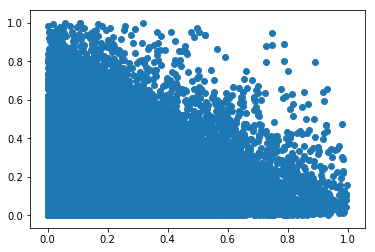

In [28]:
plt.figure()
plt.scatter(exc.iloc[:,7],exc.iloc[:,8])
plt.show()

In [23]:
input_table.columns

MultiIndex(levels=[['accepted', 'flags'], ['EXTPAR', 'MINPAR', 'binary'], [1, 2, 3, 11, 13, 43, 46, 61, 62, 63, 64, 65, '1/0_is/not'], ['A_Lambda', 'A_kappa', 'Atau', 'Atop', 'Kappa', 'Lambda', 'M1', 'M2', 'MQ3L', 'MtopR', 'mu_eff', 'tanB', 'calculable']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [11, 6, 7, 3, 2, 8, 9, 5, 4, 0, 1, 10, 12]],
           names=['title', 'block', 'code', 'name'])